In [17]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 40})
import seaborn as sns
import random

In [18]:
author_codes =['EAP', 'HPL', 'MWS']
code_to_author_dict = {'EAP': 'Edgar Allen Poe', 'HPL': "H.P. Lovecraft", "MWS": 'Mary Shelley'}

In [19]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [20]:
df['len'] = df.apply(lambda row: len(row.text), axis=1)
df['num_words'] = df.apply(lambda row: len(row.text.split()), axis=1)

In [21]:
df.head()

,id,text,author,len,num_words
0,id26305,"This process, however, afforded me no means of...",EAP,231,41
1,id17569,It never once occurred to me that the fumbling...,HPL,71,14
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,200,36
3,id27763,How lovely is spring As we looked from Windsor...,MWS,206,34
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,174,27


In [22]:
def string_k(k, words):
     
    string = []
    text = words.split(" ")
    for x in text:
        if len(x) > k:
            string.append(x)
    space = ' '
    return space.join(string)

In [23]:
def create_wordcloud(series, char_min = 0):
    space = ' '
    text = string_k(char_min - 1, space.join(series))
    return WordCloud().generate(text)

In [24]:
df_eap = df[df['author'] == 'EAP']
df_hpl = df[df['author'] == 'HPL']
df_mws = df[df['author'] == 'MWS']

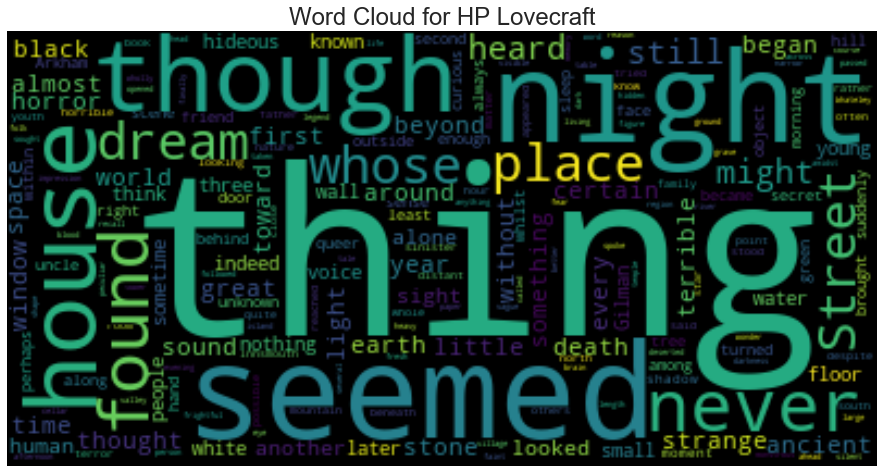

In [25]:
wordcloud = create_wordcloud(df_hpl.text, char_min = 5)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for HP Lovecraft', fontdict = {'fontsize' : 24})
plt.savefig('wordcloud_hpl.png', bbox_inches='tight', pad_inches=0)
plt.show()

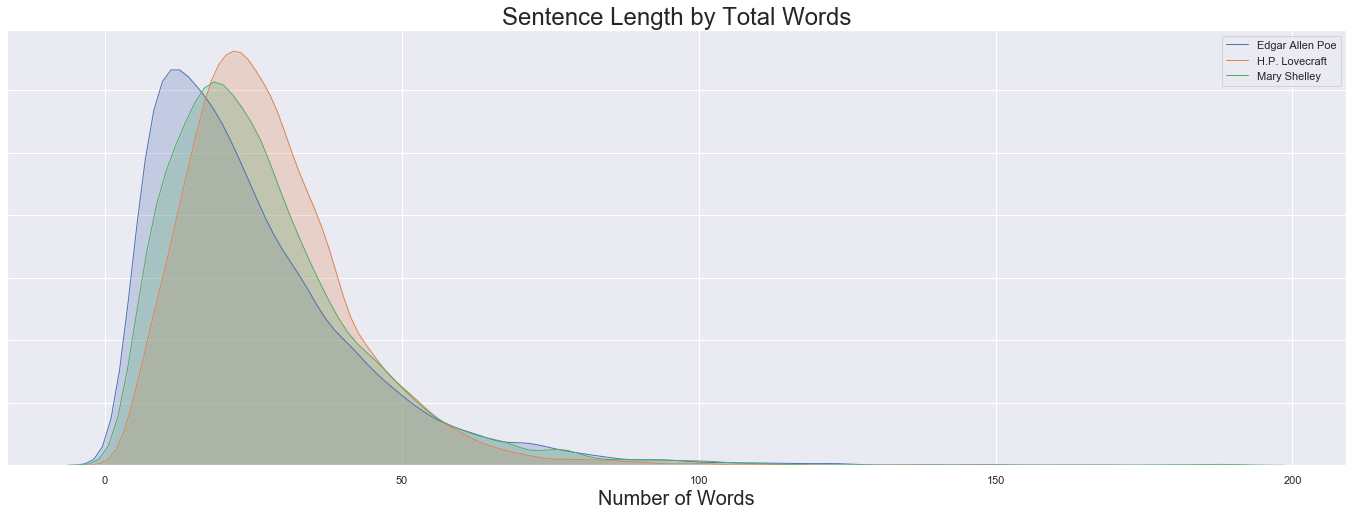

In [26]:
sns.set(rc={'figure.figsize':(24,8)})
for author_code in author_codes:
    # Subset to the airline
    subset = df[(df['author'] == author_code) & (df['num_words'] < 200)]
    
    # Draw the density plot
    sns.distplot(subset['num_words'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1}, 
                  label = code_to_author_dict[author_code])
plt.xlabel('Number of Words', fontdict = {'fontsize' : 20})
plt.title('Sentence Length by Total Words', fontdict = {'fontsize' : 24})
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.savefig('sentence_length_words_hist.png', bbox_inches='tight', pad_inches=0)

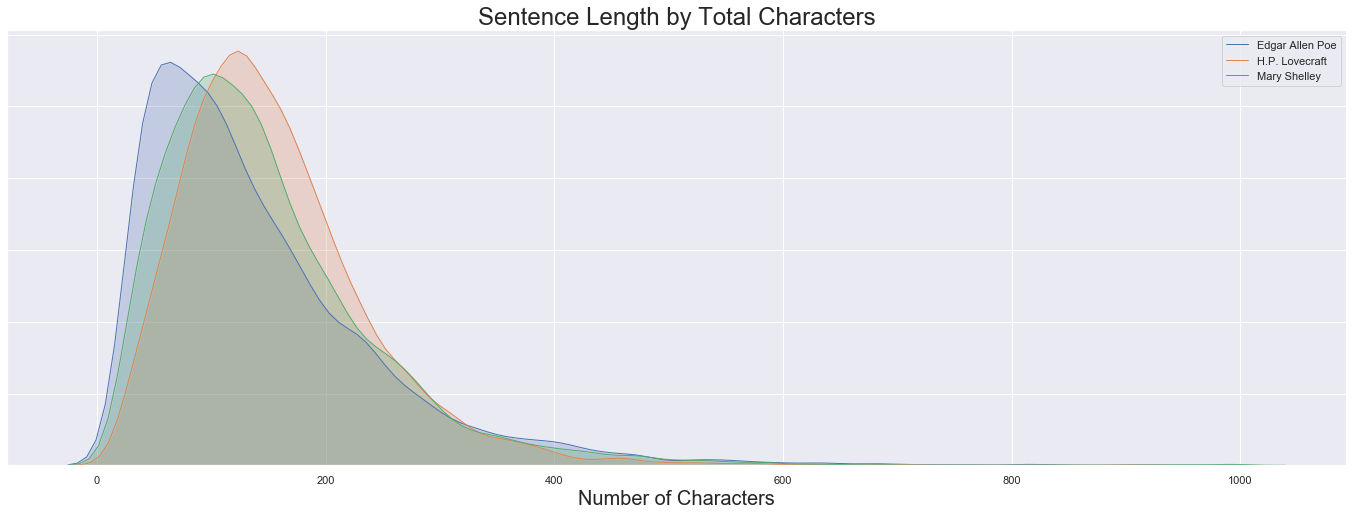

In [27]:
sns.set(rc={'figure.figsize':(24,8)})
for author_code in author_codes:
    # Subset to the airline
    subset = df[(df['author'] == author_code) & (df['len'] < 1000)]
    
    # Draw the density plot
    sns.distplot(subset['len'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1}, 
                  label = code_to_author_dict[author_code])
plt.xlabel('Number of Characters', fontdict = {'fontsize' : 20})
plt.title('Sentence Length by Total Characters', fontdict = {'fontsize' : 24})
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.savefig('sentence_length_characters_hist.png', bbox_inches='tight', pad_inches=0)

In [28]:
grouped_data = df.groupby('author')
mean = grouped_data.mean()

In [29]:
mean['avg_word_len'] = mean.apply(lambda row: row.len/row.num_words, axis=1)

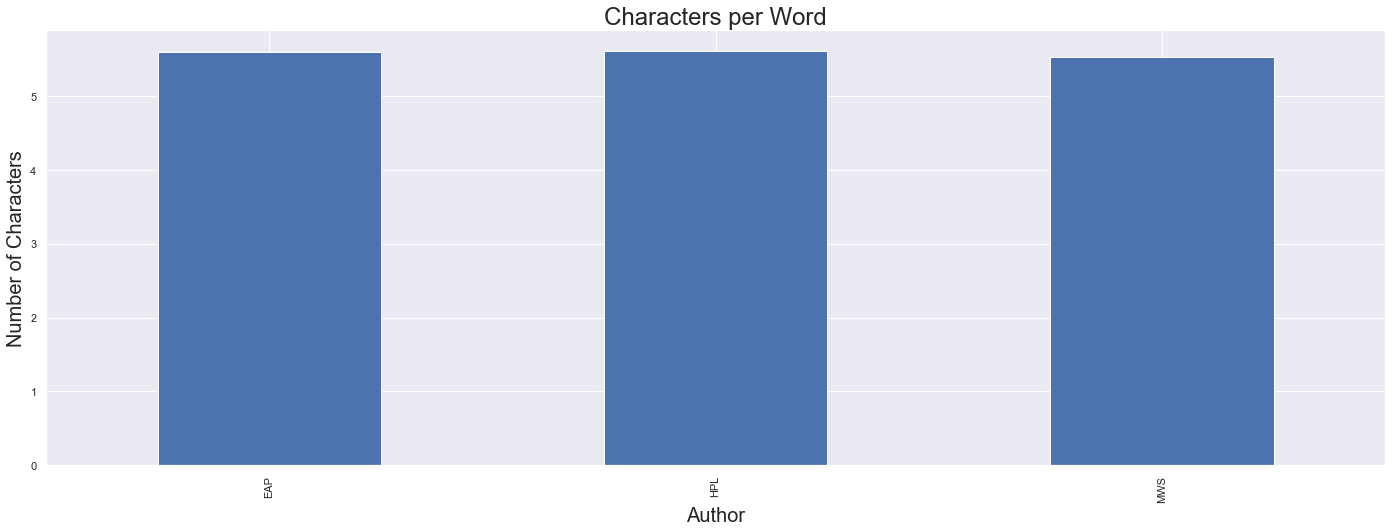

In [30]:
mean['avg_word_len'].plot(kind='bar')
plt.xlabel('Author', fontdict = {'fontsize' : 20})
plt.ylabel('Number of Characters', fontdict = {'fontsize' : 20})
plt.title('Characters per Word', fontdict = {'fontsize' : 24})
plt.savefig('characters_per_word.png', bbox_inches='tight', pad_inches=0)

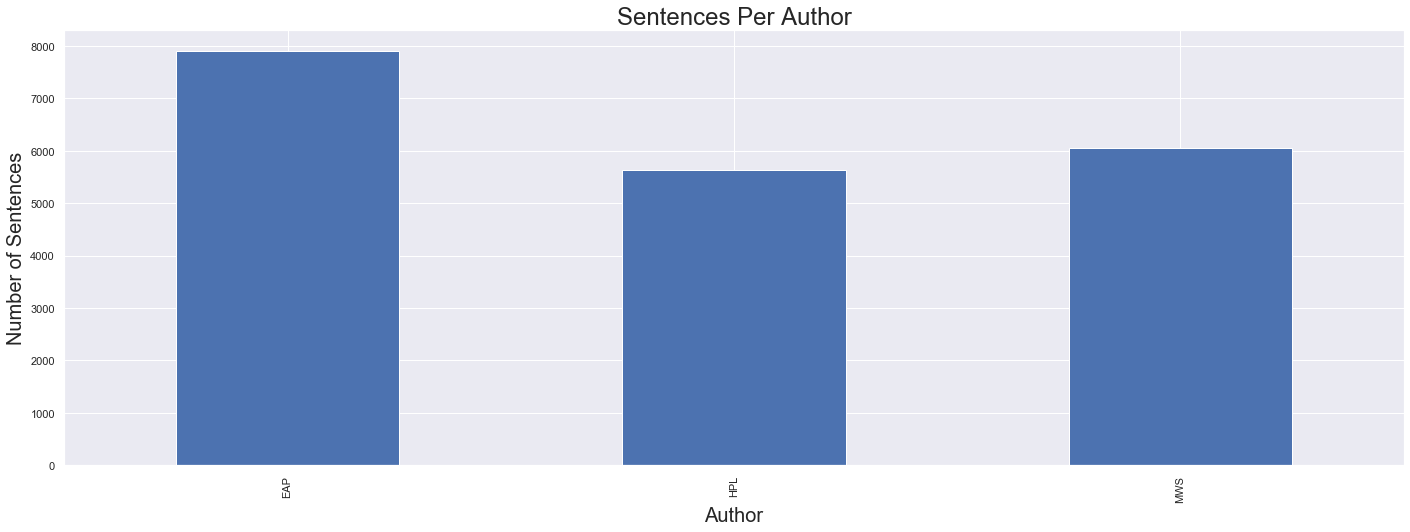

In [31]:
pct_observations = grouped_data.size()
pct_observations.plot(kind='bar')
plt.xlabel('Author', fontdict = {'fontsize' : 20})
plt.ylabel('Number of Sentences', fontdict = {'fontsize' : 20})
plt.title('Sentences Per Author', fontdict = {'fontsize' : 24})
plt.savefig('sentences_per_author.png', bbox_inches='tight', pad_inches=0)

In [ ]:
pct_observations = num_observations/sum(num_observations)
print(num_observations)

In [ ]:
def guess_author():
    rand = random.uniform(0, 1)
    if rand < .403:
        return 'EAP'
    elif rand < .691:
        return 'HPL'
    else:
        return 'MWS'

In [ ]:
df['guess'] = df.apply(lambda row: guess_author() == row['author'], axis=1)

In [ ]:
df.guess.value_counts()

In [33]:
print(6706/15500)

0.4326451612903226
